# Neural Data Science with Python - Day 4 - Notebook B
## Regression, Dimensionality Reduction, Classification and Clustering
* https://www.meetup.com/brain-and-consciousness/events/276875199/
![](images/meetupgroup.png)
* This notebook uses Python 3 (specifically, 3.9)

# Python examples from book: "Neural Data Science" by Erik Nylen and Pascal Wallisch
* https://www.amazon.com/gp/product/B06XCW39WX
* Datasets from book (and Jupyter notebooks for Python 2) at: https://www.elsevier.com/books-and-journals/book-companion/9780128040430/chapter-files#Chapter%20Files
![](images/BookCover.jpg)

# Ch 8 - Dimensionality Reduction
https://en.wikipedia.org/wiki/Regularization_(mathematics)

https://en.wikipedia.org/wiki/Dimensionality_reduction

# Toy synthetic/simulated data (sata) of neuronal cell-type-related parameters

In [1]:
import pandas as pd
cellFields = ['latency','volume','z','maxrate','spont','waveWidth','axon','dendrite']
generatorFields=['Type', 'transmission', 'latMean','latStd','volMean','volStd', 'zMean', 'zStd',
'maxrateMean', 'maxrateStd','spontMean','spontStd','waveWidth','waveStd','axonMean','axonStd',
'dendriteMean','dendriteStd']
Type1=[1, 1, 14, .5,  150,30,500,20,.9, .1,.02,.01, 1, .05, 160, 20, 180,30 ]  #L4 pyramid
Type2=[2, 1, 15, .5,  120,30,300,20,.8, .1,.07,.01, 1, .04, 150,   20, 150,30   ]  #L2 pyramid
Type3=[3, 0, 15, 1,   120,30, 300,20, .95,.1,.2,.1, .2,.001,150,   10, 150,10  ]  #L2 inhibitory PV
Type4=[4, 0, 17, 4, 110,30,300,20, .3, .1,.02,  .01,.3,.005,150,   10, 150,40  ]  #L2 inhibitory Som
Type5=[5, 1, 22, 5,  180,20,800,100,.35,.2,.35, .1,.5,.1,  1000, 500, 200,60  ]  #L6 excitatory pyramid
Type6=[6, 0, 14.5, .5, 100,30,500,20,.95,.1,.2,.1, .2,.001,150,   10, 150,10  ]  #L4 inhibitory FS
dftype = pd.DataFrame([Type1,Type2,Type3,Type4,Type5,Type6],columns=generatorFields)

In [4]:
# .loc accessor must be used instead of deprecated .ix syntax
import numpy as np
sataset = pd.DataFrame(columns=cellFields) # Initialize sataset
celltypes = pd.DataFrame(columns=['transmission']) # Initialize cell types: 1 for excitatory, 0 for inhibitory
for ii in range(100): # iterate through 100 simulated neurons
  tt = np.random.randint(6) # Randomly select a cell type among the 6
  trans = dftype.loc[tt,'transmission'] # Declare excitatory versus inhibitory
  latency = dftype.loc[tt,'latMean']+np.random.randn()*dftype.loc[tt]['latStd'] # Simulate properties with some randomness
  vol=dftype.loc[tt,'volMean']+np.random.randn()*dftype.loc[tt]['volStd'] # Simulate properties with some randomness
  z = dftype.loc[tt,'zMean']+np.random.randn()*dftype.loc[tt]['zStd'] # Simulate properties with some randomness
  maxrate = dftype.loc[tt,'maxrateMean']+np.random.randn()*dftype.loc[tt]['maxrateStd'] # Simulate properties with some randomness
  spont = dftype.loc[tt,'spontMean']+np.random.randn()*dftype.loc[tt]['spontStd'] # Simulate properties with some randomness
  waveWidth = dftype.loc[tt,'waveWidth']+np.random.randn()*dftype.loc[tt]['waveStd'] # Simulate properties with some randomness
  axon = dftype.loc[tt,'axonMean']+np.random.randn()*dftype.loc[tt]['axonStd'] # Simulate properties with some randomness
  dendrite = dftype.loc[tt,'dendriteMean']+np.random.randn()*dftype.loc[tt]['dendriteStd'] # Simulate properties with some randomness
  sataset=sataset.append(pd.DataFrame([[latency,vol,z,maxrate,spont,waveWidth,axon,dendrite]],columns=cellFields),ignore_index=True) # append to sataset
  celltypes = celltypes.append(pd.DataFrame([[trans]],columns=['transmission']),ignore_index=True) # Append cell type to its own dataframe

In [5]:
# Standardize data before input into Principal Component Analysis
display(sataset.describe())
sataset = (sataset - sataset.mean())/sataset.std()
display(sataset.describe())

,latency,volume,z,maxrate,spont,waveWidth,axon,dendrite
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.053423,131.604239,448.840317,0.734766,0.162337,0.497946,299.157818,165.724127
std,3.455600,42.104304,182.287669,0.299491,0.143921,0.345835,387.404889,48.663351
min,9.047387,34.253299,264.586510,-0.045065,-0.040109,0.198081,22.494675,87.350996
25%,14.229713,99.667115,297.894550,0.513921,0.024699,0.200141,144.125497,141.043468
50%,14.788763,130.830869,447.613466,0.842818,0.131745,0.300992,153.601072,151.870037
75%,16.411804,162.447776,513.555196,0.942772,0.275716,0.963883,167.041316,177.810434
max,29.042127,228.186501,917.026664,1.324507,0.575862,1.093218,1977.922146,389.412052


,latency,volume,z,maxrate,spont,waveWidth,axon,dendrite
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-4.729550e-16,-2.153833e-16,-1.432188e-16,-6.883383e-17,3.663736e-17,1.243450e-16,1.554312e-17,2.353673e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.027444e+00,-2.312137e+00,-1.010786e+00,-2.603850e+00,-1.406648e+00,-8.670754e-01,-7.141447e-01,-1.610517e+00
25%,-5.277551e-01,-7.585240e-01,-8.280635e-01,-7.373973e-01,-9.563400e-01,-8.611182e-01,-4.001816e-01,-5.071714e-01
50%,-3.659741e-01,-1.836796e-02,-6.730299e-03,3.607874e-01,-2.125617e-01,-5.695038e-01,-3.757225e-01,-2.846925e-01
75%,1.037101e-01,7.325507e-01,3.550151e-01,6.945304e-01,7.877878e-01,1.347281e+00,-3.410295e-01,2.483657e-01
max,3.758741e+00,2.293881e+00,2.568393e+00,1.969142e+00,2.873285e+00,1.721258e+00,4.333359e+00,4.596640e+00


In [6]:
covSATA=sataset.cov()
covSATA

,latency,volume,z,maxrate,spont,waveWidth,axon,dendrite
latency,1.000000,0.352306,0.462557,-0.554511,0.430510,-0.086858,0.540745,0.350211
volume,0.352306,1.000000,0.524446,-0.285620,0.231414,0.272652,0.484229,0.384710
z,0.462557,0.524446,1.000000,-0.382380,0.545658,0.137746,0.706626,0.474979
maxrate,-0.554511,-0.285620,-0.382380,1.000000,-0.126451,-0.005753,-0.564699,-0.229214
spont,0.430510,0.231414,0.545658,-0.126451,1.000000,-0.392051,0.550999,0.320375
waveWidth,-0.086858,0.272652,0.137746,-0.005753,-0.392051,1.000000,0.007276,0.187595
axon,0.540745,0.484229,0.706626,-0.564699,0.550999,0.007276,1.000000,0.324686
dendrite,0.350211,0.384710,0.474979,-0.229214,0.320375,0.187595,0.324686,1.000000


In [10]:
Eva,Eve=np.linalg.eig(covSATA) # Calculate eigenvectors and eigenvalues from the covariance matrix
for eigenvector, eigenvalue in zip(Eve, Eva):
    print('eigenvalue:',eigenvalue)
    print('eigenvector:',eigenvector)
    print('\n')

eigenvalue: 3.5820897399987777
eigenvector: [-0.39144729 -0.13854111 -0.31782468 -0.31178636  0.31507417  0.706244
 -0.16104335 -0.07324498]


eigenvalue: 1.43996734542777
eigenvector: [-0.34490843  0.34064143  0.14186956  0.34144894  0.75490569 -0.22851456
  0.07864337  0.00097088]


eigenvalue: 0.9613715012178312
eigenvector: [-0.44415548  0.07322029  0.21715191  0.22928069 -0.36169937  0.03502108
 -0.06931212 -0.74885448]


eigenvalue: 0.6666787933835003
eigenvector: [ 0.33176027 -0.01859639  0.70783974  0.13240425  0.13416091  0.40246502
 -0.43511109  0.04150209]


eigenvalue: 0.5036805832830351
eigenvector: [-0.33905747 -0.4656722   0.41670211  0.08735479 -0.0804569   0.15207411
  0.60962891  0.29269551]


eigenvalue: 0.41169427564200395
eigenvector: [-0.02045002  0.76851875  0.01169643  0.07208298 -0.29995158  0.40397276
  0.29744846  0.24897276]


eigenvalue: 0.18853921399299398
eigenvector: [-0.45292803 -0.06342535 -0.10656649  0.34611514 -0.28905871 -0.09895904
 -0.54148773  0

In [14]:
eigenSum = np.sum(Eve) 
print('eigenSum:',eigenSum)

eigenSum: 1.5502044011549367


In [15]:
display(sataset.head())  # X
display(celltypes.head())  # y

,latency,volume,z,maxrate,spont,waveWidth,axon,dendrite
0,-0.417826,1.477244,0.353219,0.395345,-0.910564,1.346169,-0.340682,0.100172
1,0.327050,1.293031,1.908161,-1.215539,1.674440,-0.055980,1.719761,0.111980
2,-0.623010,1.162681,1.845033,-1.295576,0.392768,0.222334,1.516003,-0.555737
3,-0.116027,-1.324393,-0.830508,0.776214,-0.707829,1.530801,-0.352071,-1.500946
4,-1.233579,-0.593391,-0.938832,-1.431142,-1.020998,-0.556895,-0.396523,-1.423303


,transmission
0,1
1,1
2,1
3,1
4,0


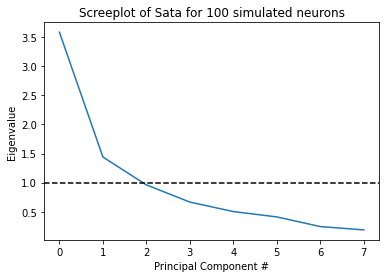

In [28]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
%matplotlib inline
pca = PCA() 
trainPercent = 100 # No train-test split in this example
trainNum = int(len(sataset)*trainPercent/100.)  # Use all examples
xTrain = pca.fit_transform(sataset[:trainNum]) # Fit the PCA to all 8 features
yTrain = celltypes[:trainNum] # Use all examples
yTrain = [_[0] for _ in np.array(yTrain)]
plt.plot(pca.explained_variance_ratio_*8)
plt.axhline(1,c='k',ls='--')
plt.title('Screeplot of Sata for 100 simulated neurons')
plt.ylabel('Eigenvalue')
plt.xlabel('Principal Component #')
plt.show()

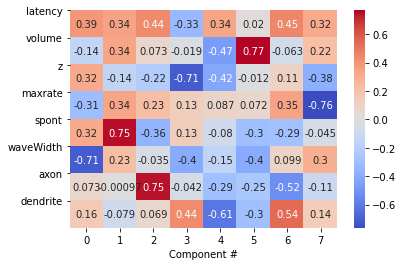

In [45]:
# It is often useful to examine the components/eigenvectors
import seaborn as sns
sns.heatmap(pca.components_, cmap='coolwarm', annot=True)
plt.xlabel('Component #')
plt.yticks(range(8),labels=cellFields, rotation=0)
plt.show()

### When deciding how many dimensions/components/eigenvectors to keep, there are a few different strategies:
* Keep all eigenvectors larger than 1 (the "Kaiser criterion")
* Keep as many eigenvectors as necessary to explain 90% of variance in original data
* Scree plot (keep everything left of the elbow - Note this is highly subjective)
* Horn's parallel analysis approach - simulate totally random data of equal dimensionality, and use highest eigenvalue of this as a threshold

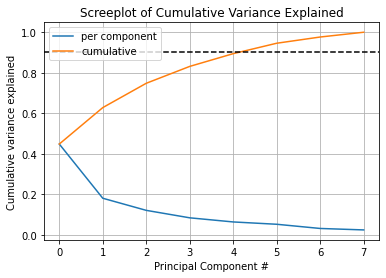

In [23]:
plt.plot(pca.explained_variance_ratio_, label='per component') # plot variance explained by each component
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='cumulative') # plot cumulative explained variance
plt.axhline(.9,c='k',ls='--') # draw dashed line at 90% explained
plt.title('Screeplot of Cumulative Variance Explained') 
plt.ylabel('Cumulative variance explained')
plt.xlabel('Principal Component #')
plt.legend(loc='upper left')
plt.grid()
plt.show()

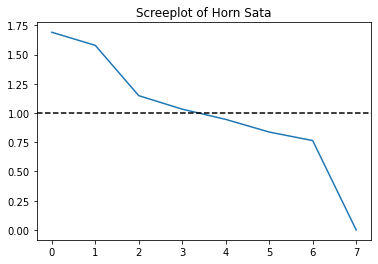

In [26]:
hornmat = np.array(np.random.randn(8,100)) # random numbers of 8 features and 100 observations
pca = PCA() # new PCA model
trainPercent = 100 # use all observations
trainNum = int(len(hornmat)*trainPercent/100.) 
xTrain = pca.fit_transform(hornmat[:trainNum]) # fit PCA to features
yTrain = celltypes[:trainNum] 
yTrain = [_ for _ in np.array(yTrain)] 
plt.plot(pca.explained_variance_ratio_*8) # plot eigenvalues of random sata
plt.axhline(1, color='k', linestyle='--') 
plt.title('Screeplot of Horn Sata')
plt.show()

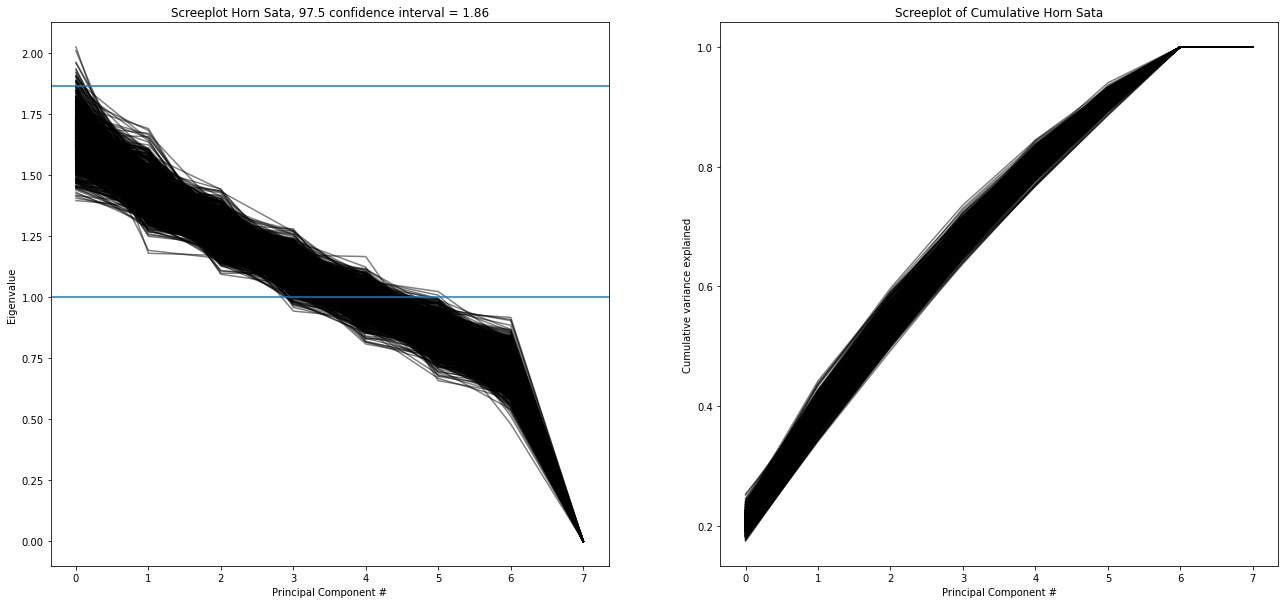

In [27]:
# Repeat the previous cell 1000 times
fig = plt.figure(figsize=(22,10)) #1
ax = plt.subplot(121);ax2 = plt.subplot(122)#2
firstPC = [] #3
for hornNum in range(1000): #4
    hornmat = np.array(np.random.randn(8,100))#5
    pca = PCA() #6
    trainPercent = 100 #7
    trainNum = int(len(hornmat)*trainPercent/100.) #8
    xTrain = pca.fit_transform(hornmat[:trainNum]) # 9
    yTrain = celltypes[:trainNum] # 10
    yTrain = [_[0] for _ in np.array(yTrain)] #11
    explained = pca.explained_variance_ratio_*8 #12
    firstPC.append(explained[0]) #13
    ax.plot(explained,alpha=0.5,c='k') #14
    ax2.plot(np.cumsum(pca.explained_variance_ratio_),alpha=0.5,c='k') #15
ax.axhline(1) #16
hornconf=sorted(firstPC)[975] #17
ax.axhline(hornconf) #18
ax.set_title('Screeplot Horn Sata, 97.5 confidence interval = '+str(hornconf)[:4]) #19
ax.set_xlabel('Principal Component #') #20
ax.set_ylabel('Eigenvalue') #20
ax2.set_title('Screeplot of Cumulative Horn Sata') #20
ax2.set_xlabel('Principal Component #') #20

ax2.set_ylabel('Cumulative variance explained') #20
#plt.savefig('Screeplot of Horn Sata 1000 trials.png',dpi=300) #21
plt.show()

(-6.837816956673282, 2.7714748506270963, -2.24210544197072, 2.622291283310109)

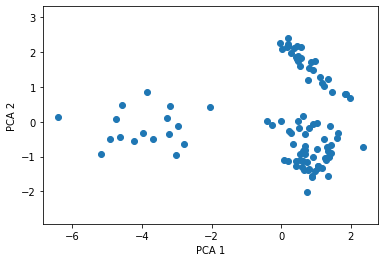

In [46]:
# Scatterplots of projection to top 2 components often make breath-taking visualizations

rotatedSataArray = np.dot(np.array(sataset),Eve); #2, no need to flip in Python
plt.figure() #3
plt.scatter(rotatedSataArray[:,0],rotatedSataArray[:,1]) #4
plt.xlabel('PCA 1'); plt.ylabel('PCA 2') #5
plt.axis('equal') #6

(-6.837816956673282, 2.7714748506270963, -2.24210544197072, 2.622291283310109)

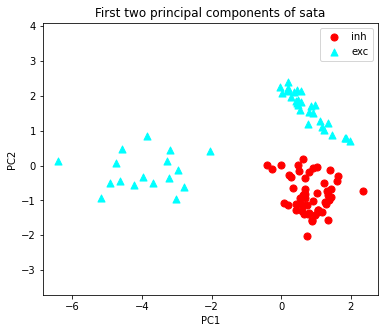

In [47]:
fig=plt.figure(figsize=(6,5)) #1
markershape = ['o','^'] # circle and triangle #2
markercolor = ['red','cyan'] #3
markerlabel = ['inh','exc'] #4
yTrain = np.array(celltypes['transmission'])
for yind,yval in enumerate(set(yTrain)): #5
    plt.scatter(rotatedSataArray[yTrain==yval,0],\
                rotatedSataArray[yTrain==yval,1],\
                c=markercolor[yind],marker=markershape[yind],label=markerlabel[yind],s=50) #6
plt.xlabel('PC1') #7
plt.ylabel('PC2') #7
plt.title('First two principal components of sata') #8
plt.legend() #9
plt.axis('equal')#10

# Example from my own work.
![](images/SNS_pre.png)
![](images/SNS_PCA.png)
![](images/SNS_PCA2.png)
![](images/SNS_3.png)
![](images/SNS4.png)

# Ch 9 - Classification and Clustering

Text(0, 0.5, 'Count')

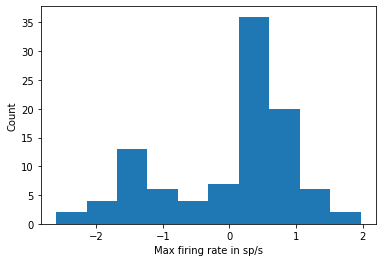

In [48]:
# Previous Sataset of simulated neuronal diversity
f = plt.figure() #1
plt.hist(sataset['maxrate']) #2
plt.xlabel('Max firing rate in sp/s') #3
plt.ylabel('Count')#3

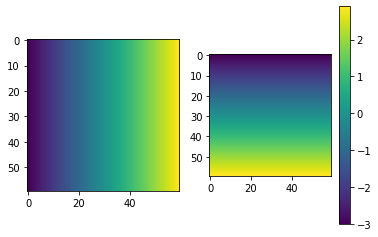

In [49]:
# demo meshgrid
X,Y = np.meshgrid(np.arange(-3,3,.1), np.arange(-3,3,.1)); #1
f=plt.figure #2
plt.subplot(1,2,1) #2
plt.imshow(X) #3
plt.subplot(1,2,2) #4
plt.imshow(Y) #5
plt.colorbar() #6

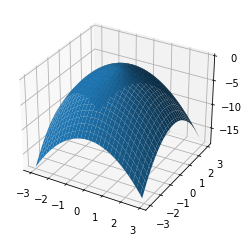

In [50]:
# demo 3D surface plot
from mpl_toolkits.mplot3d import Axes3D #0
Z = -1.*(X**2 + Y**2); #1
fig = plt.figure() #2
ax = fig.add_subplot(111, projection='3d')
h = ax.plot_surface(X,Y,Z) #3

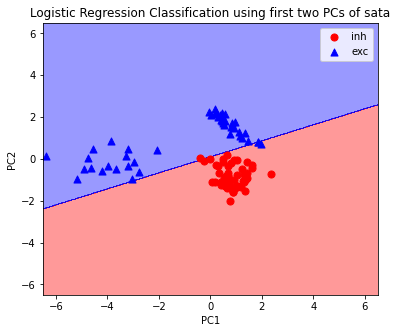

Remember how Logistic Regression has a linear model embedded within... this pops up as the decision boundary here


In [62]:
yTrain = yTrain.astype('int')

from sklearn.linear_model import LogisticRegression #1
from matplotlib.colors import ListedColormap #2
logRegression = LogisticRegression() #3
logRegression.fit(rotatedSataArray[:,:2],yTrain) #4
fig=plt.figure(figsize=(6,5)) #5
markershape = ['o','^'] #6
markercolor = ['red','b'] #7
markerlabel = ['inh','exc'] #8
gridRes=.02 #9
xTrain = np.array(rotatedSataArray[:,:2])
cmap = ListedColormap(markercolor) #10
maxval = max(-1*xTrain.min(),xTrain.max())+.1 #11
minval = -maxval #12
xgrid,ygrid=np.meshgrid(np.arange(minval,maxval,gridRes),np.arange(minval,maxval,gridRes)) #13
Z = logRegression.predict(np.array([xgrid.flatten(),ygrid.flatten()]).T) #14
Z = Z.reshape(xgrid.shape) #15
plt.contourf(xgrid,ygrid,Z,alpha=0.4,cmap=cmap) #16
for yind,yval in enumerate(set(yTrain)): #17
    plt.scatter(x=xTrain[yTrain==yval,0], y=xTrain[yTrain==yval,1], c=markercolor[yind],\
    marker=markershape[yind], label=markerlabel[yind],s=50) #18
plt.xlabel('PC1');plt.ylabel('PC2') #19
plt.title('Logistic Regression Classification using first two PCs of sata') #20
plt.legend() #21
plt.show()
print('Remember how Logistic Regression has a linear model embedded within... this pops up as the decision boundary here')

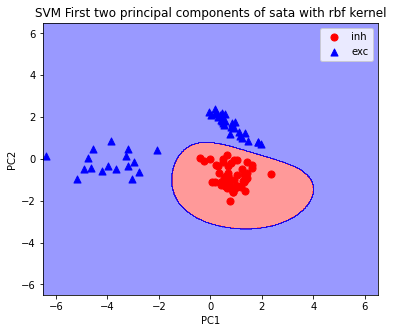

Radial basis function often more convenient


In [63]:
from sklearn import svm #1
clf = svm.SVC() #2
clf.fit(xTrain, yTrain)#3
fig=plt.figure(figsize=(6,5)) #4
markershape = ['o','^'] # 5
markercolor = ['red','b'] #6
markerlabel = ['inh','exc'] #7
gridRes=.02 #8
cmap = ListedColormap(markercolor[:len(set(yTrain))]) #9
maxval = max(-1*xTrain.min(),xTrain.max())+.1 #10
minval = -maxval #11
xgrid,ygrid=np.meshgrid(np.arange(minval,maxval,gridRes),np.arange(minval,maxval,gridRes)) #12
Z = clf.predict(np.array([xgrid.flatten(),ygrid.flatten()]).T) #13
Z = Z.reshape(xgrid.shape) #14
plt.contourf(xgrid,ygrid,Z,alpha=0.4,cmap=cmap) #15
for yind,yval in enumerate(set(yTrain)): #16
    plt.scatter(x=xTrain[yTrain==yval,0], y=xTrain[yTrain==yval,1], c=markercolor[yind],\
    marker=markershape[yind], label=markerlabel[yind],s=50) #17
plt.xlabel('PC1');plt.ylabel('PC2')#18
plt.title('SVM First two principal components of sata with '+clf.kernel+' kernel') #19
plt.legend() #20
plt.show()
print('Radial basis function often more convenient')

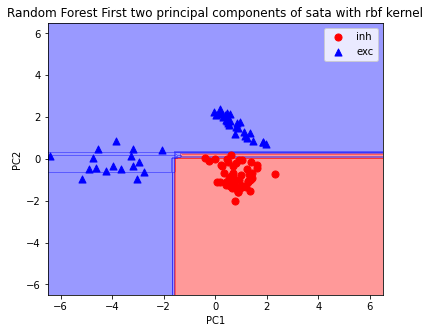

Random Forest has a non-Euclidean character. Decisions often made based on 1-dimensional considerations.


In [66]:
from sklearn.ensemble import RandomForestRegressor #1
regressor = RandomForestRegressor(n_estimators=10, min_samples_split=2) #2
regressor.fit(xTrain, yTrain) #3
fig=plt.figure(figsize=(6,5))
markershape = ['o','^'] # circle and triangle
markercolor = ['red','b']
markerlabel = ['inh','exc']
gridRes =.05
cmap = ListedColormap(markercolor[:len(set(yTrain))])
maxval = max(-1*xTrain.min(),xTrain.max())+.1
minval = -maxval
xgrid,ygrid=np.meshgrid(np.arange(minval,maxval,gridRes),np.arange(minval,maxval,gridRes))
Z = regressor.predict(np.array([xgrid.flatten(),ygrid.flatten()]).T)
Z = Z.reshape(xgrid.shape)
plt.contourf(xgrid,ygrid,Z,alpha=0.4,cmap=cmap)
for yind,yval in enumerate(set(yTrain)): 
    plt.scatter(x=xTrain[yTrain==yval,0], y=xTrain[yTrain==yval,1], c=markercolor[yind], marker=markershape[yind],label=markerlabel[yind],s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Random Forest First two principal components of sata with '+clf.kernel+' kernel') 
plt.legend()
#plt.savefig('Figure 9.10. Random Forest Regression of first two principal components of 100 neuron sata.png',dpi=300)
plt.show()
print('Random Forest has a non-Euclidean character. Decisions often made based on 1-dimensional considerations.')